<a href="https://colab.research.google.com/github/YoshifumiMiyagi/Coronary-artery-brightness/blob/main/IP_CAbrightness_1219_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['ID', 'CA_min', 'CA_max', 'CA_median', 'CA_IQR', 'CA_mean', 'CA_stdDV',
       'CA_95%CL_low', 'CA_95%Ci_upper', 'prePCT (ng/mL)',
       ...
       'meanAll_RCA', 'stdAll_RCA', 'min_RCA', 'max_RCA', 'median_RCA',
       'IQR_RCA', 'mean_RCA', 'stdDV_RCA', '95%low_RCA', '95%upper_RCA'],
      dtype='object', length=119)
CA_max       0
CA_median    0
CA_mean      0
dtype: int64


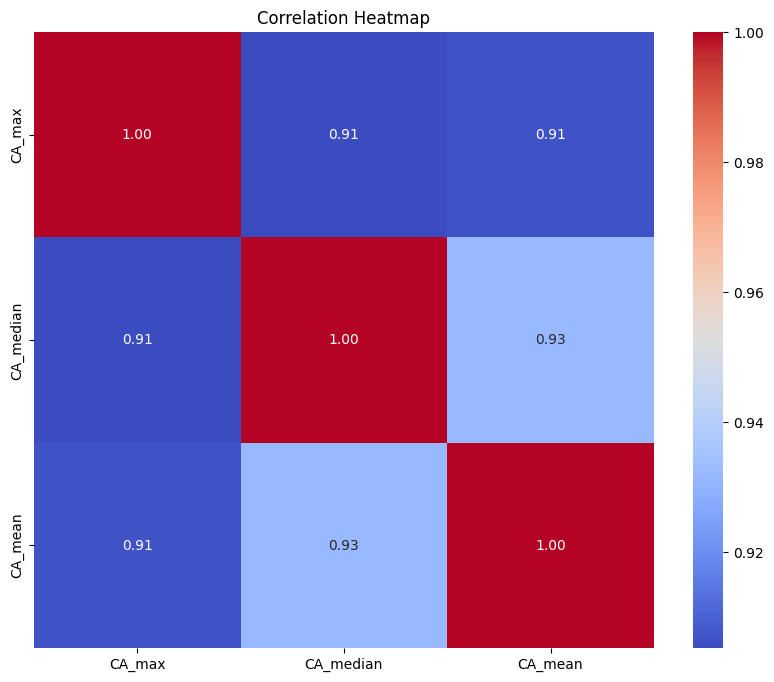

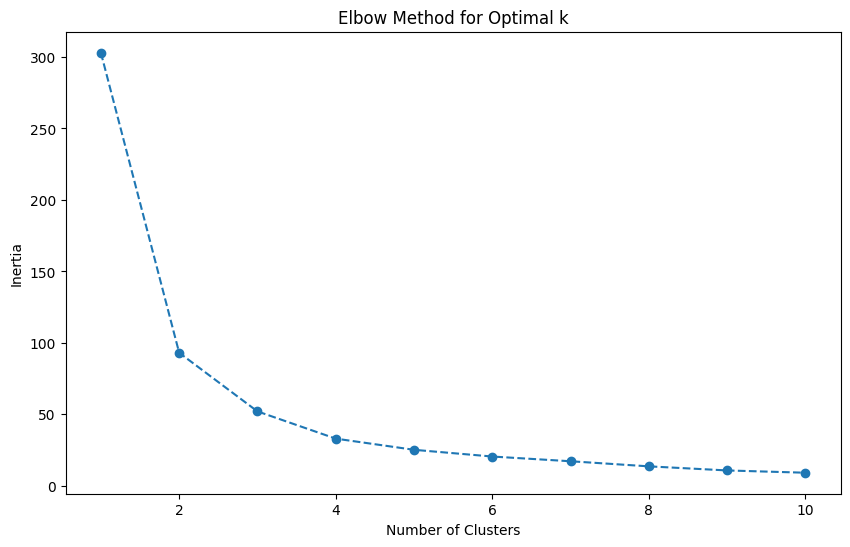

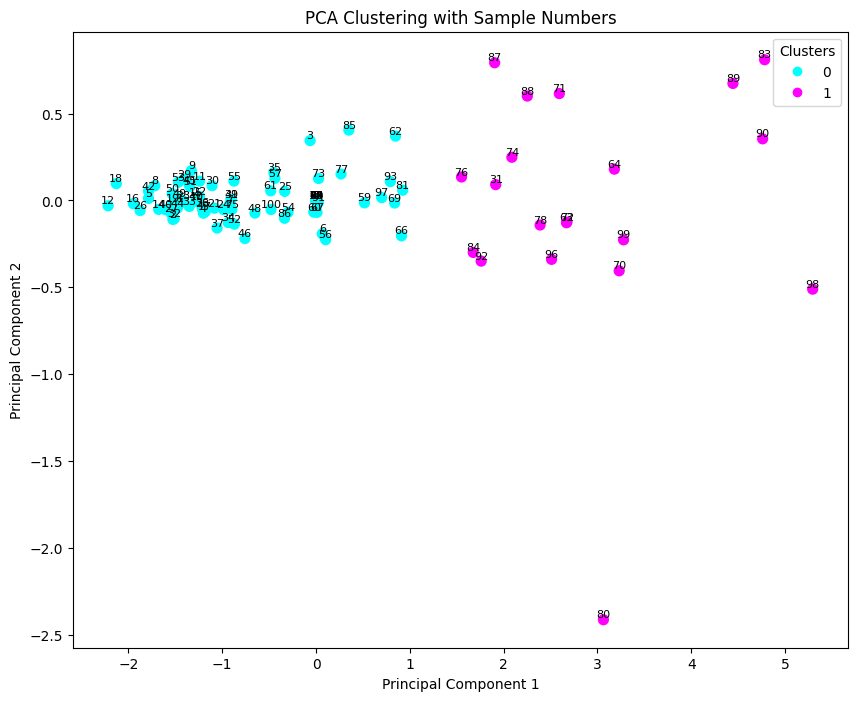

In [43]:
# prompt: PCAでクラスタリング dotにサンプリング番号を図示

import numpy as np
import pandas as pd
import codecs
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

SEED = 42
!pip install openpyxl

raw1 = pd.read_excel("/content/drive/MyDrive/R6_12_19_miyagi_consult.xlsx")
print(raw1.columns)
raw1
raw1.columns
df  = raw1
#df  = raw1.drop(columns=['ID'])
#
df.isnull().sum()

# Instead of dropping all rows with NaNs, consider filling them with a suitable value,
# such as the mean or median of the column.
#Df = df.dropna()
df_cleaned = df[['CA_max','CA_median','CA_mean']].fillna(df[['CA_max','CA_median','CA_mean']].mean())
print(df_cleaned.isnull().sum())
df_cleaned



corr = df_cleaned.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Choose the optimal k based on the elbow method.
# From the plot, k=3 seems like a good choice. You might need to adjust.
optimal_k = 2

# Apply k-means clustering using the scaled and PCA transformed data
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=SEED)
kmeans_labels = kmeans.fit_predict(pca_features)


# Create a scatter plot of the PCA results, color-coded by cluster, and annotated with the original index
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans_labels, cmap='cool', s=50)
plt.title('PCA Clustering with Sample Numbers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(*scatter.legend_elements(), title='Clusters')

# Annotate each point with its original index
for i, (x, y) in enumerate(pca_features):
  plt.text(x, y, str(i), fontsize=8, ha='center', va='bottom')
plt.show()